In [1]:
#import xarray as xr
import cfgrib
import numpy as np
import matplotlib.pyplot as plt

from data_processor import DataProcessor
from smoothing import SmoothingPredictor

c:\Users\iwama\Desktop\Maciej\Eng\meteoapp-data\venv\lib\site-packages\gribapi\__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.27.0
  warnings.warn(


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# https://github.com/ecmwf/cfgrib/issues/164
grib_data = cfgrib.open_datasets('../data2022.grib')
surface = grib_data[0] 
hybrid = grib_data[1] 

In [4]:
feature_list = ['t2m', 'sp', 'tcc', 'u10', 'v10', 'tp']
t2m = surface.t2m.to_numpy() - 273.15  # -> C
sp = surface.sp.to_numpy() / 100       # -> hPa
tcc = surface.tcc.to_numpy()
u10 = surface.u10.to_numpy()
v10 = surface.v10.to_numpy()
tp = hybrid.tp.to_numpy().reshape((-1,) + hybrid.tp.shape[2:])
data = np.stack((t2m, sp, tcc, u10, v10, tp), axis=-1)

In [5]:
# s -> AUTOREG_SEQUENCE_LENGTH (input_size)
# fh -> FORECASTING_HORIZON
# (X1,X2,...,Xs) -> (Ys+1,Ys+2,...,Ys+fh)
s = 3
fh = 2

processor = DataProcessor(data)
X, y = processor.preprocess(s, fh, use_neighbours=False)
X_train, X_test, y_train, y_test = processor.train_test_split(X, y)

In [6]:
X.shape, y.shape

((1428, 25, 45, 3, 6), (1428, 25, 45, 2, 6))

SIMPLE
smoothing_level    0.081869
initial_level      5.879759
Name: param, dtype: float64

0 / 5
RMSE t2m: 3.19286
RMSE sp: 2.25544
RMSE tcc: 0.32511
RMSE u10: 2.43085
RMSE v10: 3.60039
RMSE tp: 0.00024


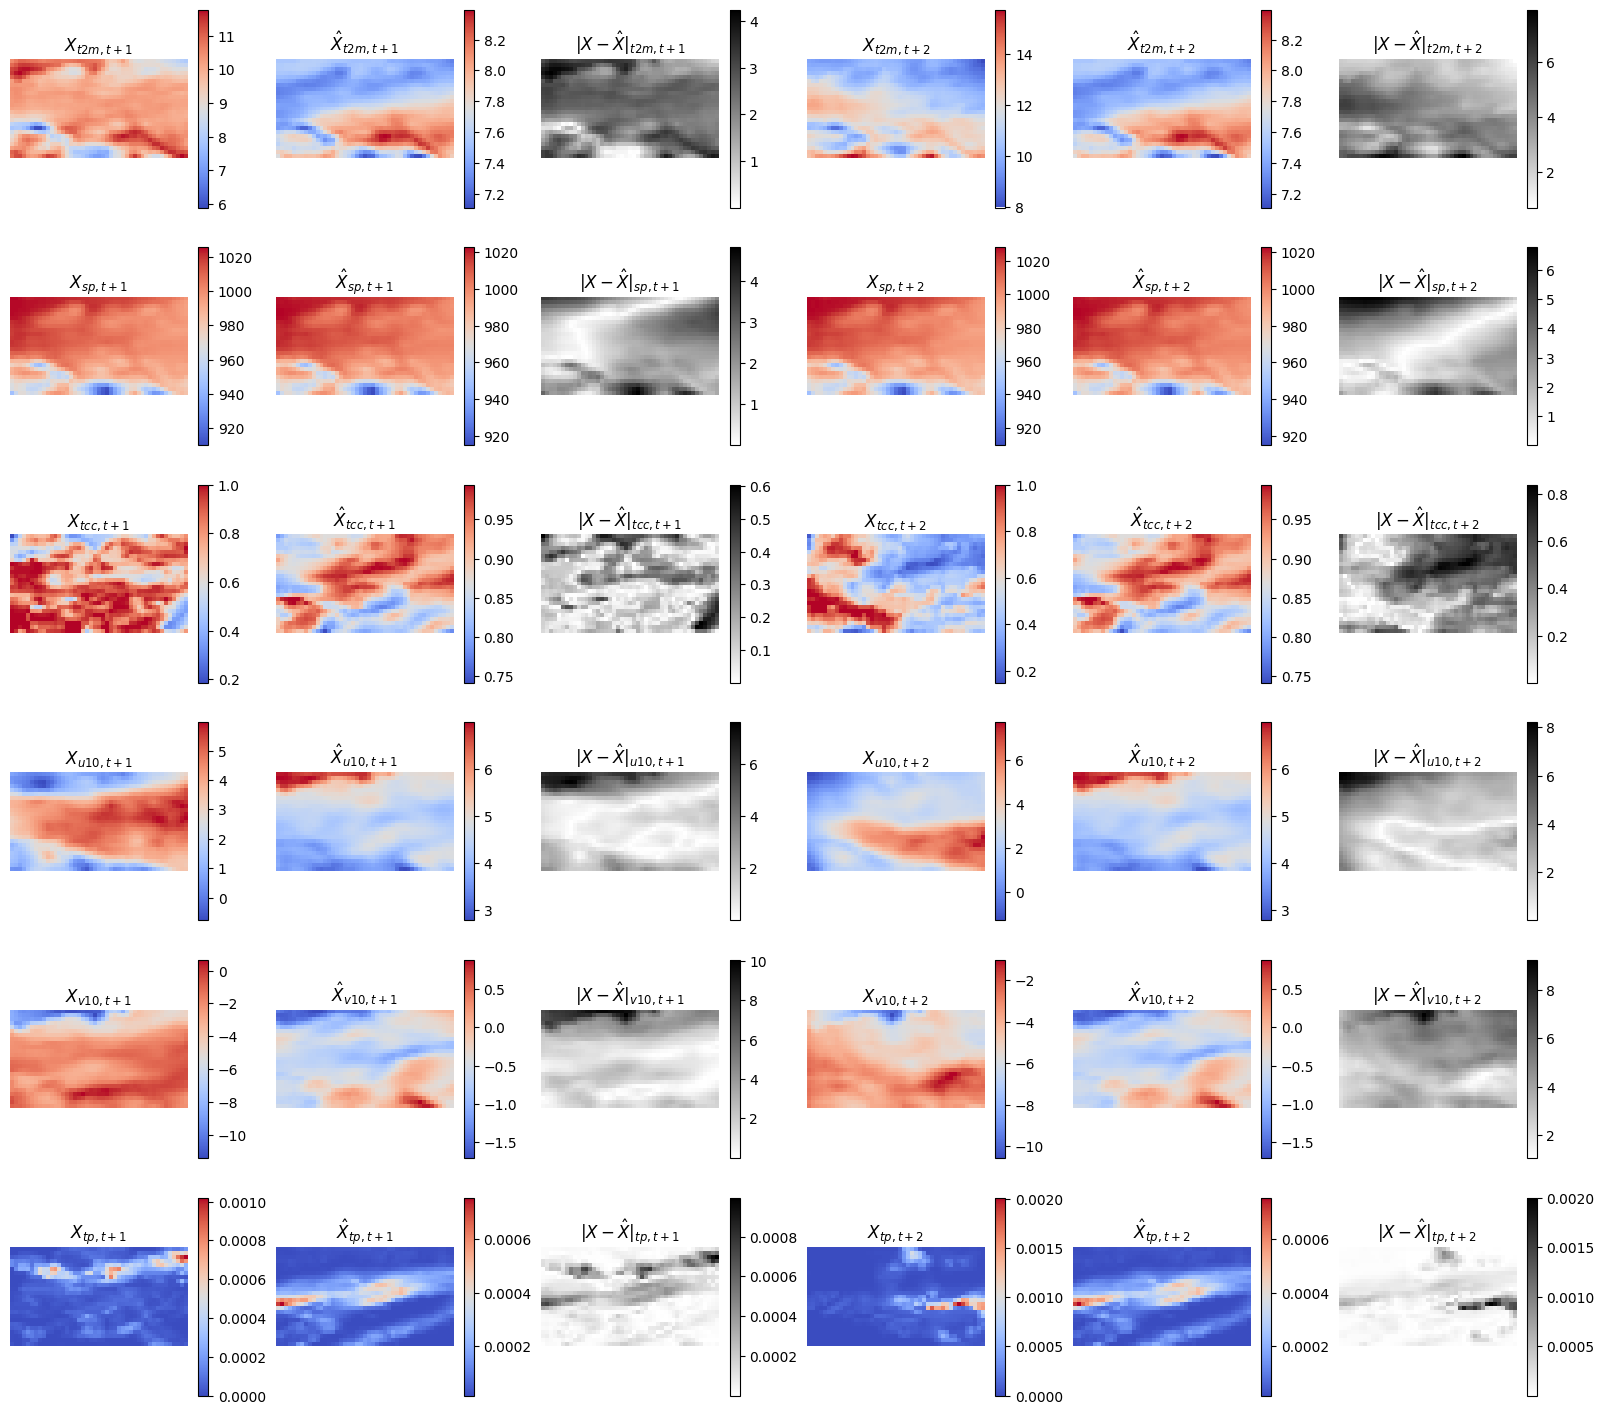

Evaluation metrics for entire test set:
RMSE t2m: 3.706
RMSE sp: 2.855
RMSE tcc: 0.48
RMSE u10: 3.494
RMSE v10: 2.75
RMSE tp: 0.0



In [9]:
available_types = ['simple'] # 'simple'
for smoothing in available_types:
    print(smoothing.upper())
    predictor = SmoothingPredictor(X.shape, fh, feature_list, smoothing)
    predictor.train(X_train, y_train)
    _ = predictor.predict_and_evaluate(X_test[:5], y_test[:5], max_samples=1)
    print()

In [8]:
"""
HOLT:
=======================================
Evaluation metrics for entire test set:
=======================================
RMSE t2m: 316.18
RMSE sp: 923.667
RMSE tcc: 316.594
RMSE u10: 317.978
RMSE v10: 317.487
RMSE tp: 317.888

SIMPLE:
=======================================
Evaluation metrics for entire test set:
=======================================
RMSE t2m: 398.852
RMSE sp: 904.216
RMSE tcc: 399.738
RMSE u10: 401.017
RMSE v10: 400.634
RMSE tp: 401.159

ALL AROUND - TERRIBLE RESULTS

For łopatologiczne 4 for loops
HOLT:
=======================================
Evaluation metrics for entire test set:
=======================================
RMSE t2m: 3.724
RMSE sp: 9.183
RMSE tcc: 0.48
RMSE u10: 3.243
RMSE v10: 3.007
RMSE tp: 0.0

SIMPLE:
=======================================
Evaluation metrics for entire test set:
=======================================
RMSE t2m: 3.706
RMSE sp: 2.855
RMSE tcc: 0.48
RMSE u10: 3.494
RMSE v10: 2.75
RMSE tp: 0.0
"""
0

0